## Antoni Zyla Ecology Code

Imports

In [2]:
import pandas as pd #this imports the pandas library and aliases it as pd. 
#Pandas is a which is a data manipulation and analysis tool
import matplotlib.pyplot as plt #this imports the matplotlib.pyplot library and aliases it as plt. 
# matplotlib is a data visualisation tool 
import seaborn as sns # this imports seaborn and aliases it as sns.
# seaborn is a data visualization library based on matplotlib 
from pymer4.models import Lmer
# imports the Lmer function from pymer4, which is the only part of the package we need in this analysis

Data frames from google sheets CSVs

In [3]:
# Aquatic Habitat Abundance 
sheet_id ='1dqcFrvIfF2WVPrKA83ExjGnxAiVKlloP'
AH_abundance_df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv") #format string

# Adult Mosquito Data
sheet_id_2 = '1Rqp9Bvi9K5-asZhSynNrUxYsNVSW4IWm' 
Adult_demography_df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id_2}/export?format=csv") #format string

# Adult and Larval Abundance 
sheet_id_3 = '1BHoLClHQ46arFSaRhfIAw9yJq9UDDsI6'
Adult_larval_df = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id_3}/export?format=csv") #format string
Adult_larval_df = Adult_larval_df.rename(columns={'Total_Larvae ': 'Total_Larvae'}) 
# one of the columns contained a space at the end

Viewing the data frames
1. Aqauatic Habitat Abundance
2. Adult Mosquito Data
3. Adult and Larval Abundance

In [4]:
AH_abundance_df
Adult_demography_df
Adult_larval_df

,Replicate,Land_type,Land_subtype,Total_Larvae,Total_Adults,Total_Albo_Larvae
0,LFE 706,N,CF,43,0,0
1,LFE 707,N,CF,0,0,0
2,LFE 708,N,CF,0,0,0
3,LFE 709,N,CF,0,1,0
4,B 605,N,FF,0,0,0
5,B 611,N,FF,0,0,0
6,B 604,N,FF,0,0,0
7,B 609,N,FF,0,0,0
8,Belian,HS,OP,1,28,0
9,Mengaris,HS,OP,6,19,0


 1. Boxplot comparing the number of aquatic habitats for each land type 


[Text(0.5, 0, 'Land Type'), Text(0, 0.5, 'Number Aquatic Habitats')]

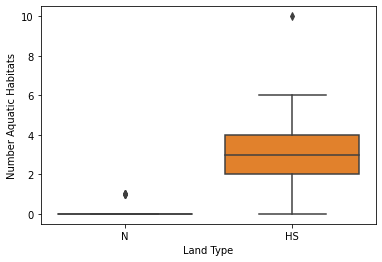

In [10]:
sns.boxplot(x='Land_type', y='Number_aquatic_habitats', data=AH_abundance_df).set(
            xlabel='Land Type', 
            ylabel='Number Aquatic Habitats')

 2. Boxplot comparing the number of aquatic habitats for each land subtype 


[Text(0.5, 0, 'Land Subtype'), Text(0, 0.5, 'Number of Aquatic Habitats')]

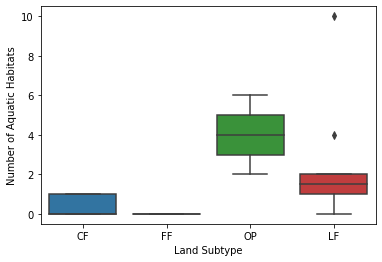

In [9]:
sns.boxplot(x='Land_subtype', y='Number_aquatic_habitats', data=AH_abundance_df).set(xlabel='Land Subtype', ylabel='Number of Aquatic Habitats')

### Filtering Data

In [30]:
AH_abundance_df_filtered = AH_abundance_df.loc[AH_abundance_df['Land_subtype'] != 'FF']
# to remove 0 values as poisson will not work with that
AH_abundance_df_filtered

,Land_type,Land_subtype,Replicate,Location,Number_aquatic_habitats
0,N,CF,LFE 706,1,0
1,N,CF,LFE 706,2,1
2,N,CF,LFE 706,3,0
3,N,CF,LFE 706,4,1
4,N,CF,LFE 707,1,0
5,N,CF,LFE 707,2,0
6,N,CF,LFE 707,3,0
7,N,CF,LFE 707,4,1
8,N,CF,LFE 708,1,0
9,N,CF,LFE 708,2,0


Fitting a model to the filtered data

In [11]:
model = Lmer("Number_aquatic_habitats ~ Land_type + (1|Land_type/Land_subtype/Replicate)", data = AH_abundance_df_filtered, family = 'poisson')
# Response variable: Number aquatic habitats
# Fixed effect: Land subtype 
# Random effects: Land subtype, clustered within land type 
# Lmer automatically selects the appropriate link function, which is the logarithm.

In [12]:
print(model.fit())

boundary (singular) fit: see help('isSingular') 

Formula: Number_aquatic_habitats~Land_type+(1|Land_type/Land_subtype/Replicate)

Family: poisson	 Inference: parametric

Number of observations: 41	 Groups: {'Replicate:(Land_subtype:Land_type)': 12.0, 'Land_subtype:Land_type': 3.0, 'Land_type': 2.0}

Log-likelihood: -65.136 	 AIC: 140.271

Random effects:

                                           Name    Var    Std
Replicate:(Land_subtype:Land_type)  (Intercept)  0.032  0.178
Land_subtype:Land_type              (Intercept)  0.026  0.162
Land_type                           (Intercept)  0.000  0.000

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE  Z-stat  P-val  Sig
(Intercept)     1.152   0.799    1.506  0.180   6.387    0.0  ***
Land_typeN     -2.158  -3.103   -1.214  0.482  -4.479    0.0  ***


### Extension 1: 

The hypotheses are: 
In comparison to Natural sites, Human settlements will have:
1. More larval habitats
2. A greater abundance of *Ae. albopictus* larvae  
3. A higher density of *Ae. albopictus* adults

Thus far, we have addressed the first hypothesis.  

Use the graphical and statistical techniques to test the latter two hypotheses. 

<AxesSubplot:xlabel='Land_subtype', ylabel='Total_Albo_Larvae'>

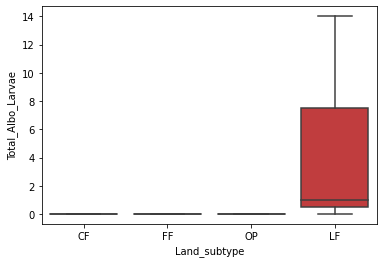

In [16]:
# 2: in comparison to natural sites human settlements will have a greater abundance of Ae. albopictus larvae

sns.boxplot(x='Land_subtype', y='Total_Albo_Larvae', data=Adult_larval_df)

Filter to get rid of any data points which contained no albo larvae

In [33]:
Adult_larval_df_filtered = Adult_larval_df#.loc[Adult_larval_df['Total_Albo_Larvae'] > 0]

,Replicate,Land_type,Land_subtype,Total_Larvae,Total_Adults,Total_Albo_Larvae
0,LFE 706,N,CF,43,0,0
1,LFE 707,N,CF,0,0,0
2,LFE 708,N,CF,0,0,0
3,LFE 709,N,CF,0,1,0
4,B 605,N,FF,0,0,0
5,B 611,N,FF,0,0,0
6,B 604,N,FF,0,0,0
7,B 609,N,FF,0,0,0
8,Belian,HS,OP,1,28,0
9,Mengaris,HS,OP,6,19,0


In [43]:
model_2 = Lmer("Total_Albo_Larvae ~ Land_type + (1|Land_type/Land_subtype/Replicate)", data = Adult_larval_df_filtered, family = 'poisson')

In [44]:
print(model_2.fit())

boundary (singular) fit: see help('isSingular') 

Formula: Total_Albo_Larvae~Land_type+(1|Land_type/Land_subtype/Replicate)

Family: poisson	 Inference: parametric

Number of observations: 14	 Groups: {'Replicate:(Land_subtype:Land_type)': 14.0, 'Land_subtype:Land_type': 4.0, 'Land_type': 2.0}

Log-likelihood: -9.430 	 AIC: 28.861

Random effects:

                                           Name    Var    Std
Replicate:(Land_subtype:Land_type)  (Intercept)  9.835  3.136
Land_subtype:Land_type              (Intercept)  0.750  0.866
Land_type                           (Intercept)  0.000  0.000

No random effect correlations specified

Fixed effects:

             Estimate        2.5_ci       97.5_ci            SE  Z-stat  \
(Intercept)    -2.537 -6.208000e+00  1.134000e+00  1.873000e+00  -1.355   
Land_typeN   -102.157 -4.650332e+07  4.650311e+07  2.372657e+07  -0.000   

             P-val Sig  
(Intercept)  0.176      
Land_typeN   1.000      


Extension part 3

In comparison to natural sites human sites will have a higher density of ae. albopictus adults

as the data does not specify the actual area of the locations for the density i will use the total amount of mosquitos per a specific location

In [81]:
Adult_demography_df['Count'] = 1
Adult_demography_df_filtered = Adult_demography_df.groupby(['Specific_location', 'Land_type', 'Land_subtype', 'Replicate'], as_index=False).sum()
Adult_demography_df_filtered

af = Adult_demography_df.agg({'Count':'sum', 'Specific_location':'unique'})

In [82]:
Adult_demography_df_filtered

,Specific_location,Land_type,Land_subtype,Replicate,Sex,Wing_length,Count
0,"3G Hill, near H1",HS,LF,SAFE fieldcamp,7,41.30,9
1,Behind shop near papaya tree,HS,LF,Sawmill,20,139.35,34
2,Near durian tree near H1,HS,OP,Merbau,1,8.30,2
3,Near durian tree near H2,HS,OP,Merbau,0,65.60,17
4,Near first house surveyed (the first 10m^2). B...,HS,OP,Mengaris,3,78.80,19
5,Near largest aquatic habitat,HS,LF,House near FC,1,4.45,1
6,Near the shop surveyed. By banana tree and rub...,HS,OP,Belian,4,108.95,28


In [83]:
model_3 = Lmer("Count ~ Land_type + (1|Land_type/Land_subtype/Replicate)", data = Adult_demography_df_filtered, family = 'poisson')

not actually possible to construct a glmm as there are no natural sites in the data therefore they cannot be compared, as shown below for sorting them by having a natural land type

In [88]:
Adult_demography_df_filtered_Natural = Adult_demography_df_filtered.loc[Adult_demography_df_filtered['Land_type'] == 'N']
Adult_demography_df_filtered_Natural

,Specific_location,Land_type,Land_subtype,Replicate,Sex,Wing_length,Count


### Extension 2

will test if mean wingspan and sex affect the number of mosquitos accross the various land subtypes

In [98]:
adult = Adult_demography_df
adult

,Replicate,Land_type,Land_subtype,Specific_location,Sex,Wing_length,Count
0,Mengaris,HS,OP,Near first house surveyed (the first 10m^2). B...,0,4.15,1
1,Mengaris,HS,OP,Near first house surveyed (the first 10m^2). B...,0,4.60,1
2,Mengaris,HS,OP,Near first house surveyed (the first 10m^2). B...,0,4.25,1
3,Mengaris,HS,OP,Near first house surveyed (the first 10m^2). B...,0,3.75,1
4,Mengaris,HS,OP,Near first house surveyed (the first 10m^2). B...,0,3.80,1
...,...,...,...,...,...,...,...
105,SAFE fieldcamp,HS,LF,"3G Hill, near H1",1,4.55,1
106,SAFE fieldcamp,HS,LF,"3G Hill, near H1",1,4.35,1
107,SAFE fieldcamp,HS,LF,"3G Hill, near H1",1,3.75,1
108,SAFE fieldcamp,HS,LF,"3G Hill, near H1",0,3.95,1


In [124]:
awing = adult.groupby(['Land_subtype','Replicate']).agg({ 'Wing_length': 'mean', 'Count':'sum'}).reset_index()
awing['Wing_length'] = awing['Wing_length'].round(0)  # had to round as the lmer wouldn't accept floating point numbers
awing

,Land_subtype,Replicate,Wing_length,Count
0,LF,House near FC,4.0,1
1,LF,SAFE fieldcamp,5.0,9
2,LF,Sawmill,4.0,34
3,OP,Belian,4.0,28
4,OP,Mengaris,4.0,19
5,OP,Merbau,4.0,19


In [128]:
model_4 = Lmer("Count ~ Wing_length + (1|Land_subtype)", data = awing, family = 'gaussian')

In [129]:
print(model_4.fit())

boundary (singular) fit: see help('isSingular') 

Formula: Count~Wing_length+(1|Land_subtype)

Family: gaussian	 Inference: parametric

Number of observations: 6	 Groups: {'Land_subtype': 2.0}

Log-likelihood: -16.576 	 AIC: 33.153

Random effects:

                     Name    Var     Std
Land_subtype  (Intercept)    0.0   0.000
Residual                   155.7  12.478

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci      SE   DF  T-stat  P-val Sig
(Intercept)      65.0 -47.073  177.073  57.181  4.0   1.137  0.319    
Wing_length     -11.2 -37.991   15.591  13.669  4.0  -0.819  0.459    


shows that the wingspan is irrelevant to the amount of adult mosquitos in a given area

testing if land type affects the sex of mosquitos

In [143]:
asex = adult.groupby(['Sex','Land_subtype', 'Replicate']).agg({ 'Count':'sum'} ).reset_index()
asex

,Sex,Land_subtype,Replicate,Count
0,0,LF,SAFE fieldcamp,2
1,0,LF,Sawmill,14
2,0,OP,Belian,24
3,0,OP,Mengaris,16
4,0,OP,Merbau,18
5,1,LF,House near FC,1
6,1,LF,SAFE fieldcamp,7
7,1,LF,Sawmill,20
8,1,OP,Belian,4
9,1,OP,Mengaris,3


In [150]:
model_5 =  Lmer("Count ~ Sex + (1|Land_subtype/Replicate)", data = asex, family = 'poisson')

<AxesSubplot:xlabel='Sex', ylabel='Count'>

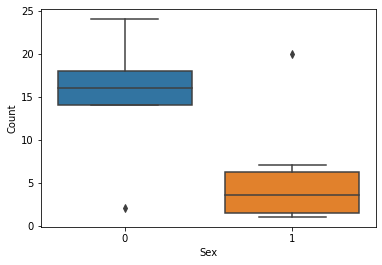

In [156]:
sns.boxplot(x='Sex', y='Count', data=asex)

In [151]:
print(model_5.fit())

boundary (singular) fit: see help('isSingular') 

Formula: Count~Sex+(1|Land_subtype/Replicate)

Family: poisson	 Inference: parametric

Number of observations: 11	 Groups: {'Replicate:Land_subtype': 6.0, 'Land_subtype': 2.0}

Log-likelihood: -45.347 	 AIC: 98.694

Random effects:

                               Name    Var    Std
Replicate:Land_subtype  (Intercept)  0.217  0.466
Land_subtype            (Intercept)  0.000  0.000

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE  Z-stat  P-val  Sig
(Intercept)     2.511   2.028    2.994  0.246  10.187    0.0  ***
Sex            -0.820  -1.226   -0.414  0.207  -3.962    0.0  ***


There are much more females (0) compared to male (1) no matter the land subtype or replicate as shown by the high z stat and low p value